In [40]:
from dbfread import DBF
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [41]:
filename = 'test_data.dbf'
table = DBF(filename, encoding='windows-1251')

df = pd.DataFrame(iter(table))
print(df.head())

df.drop('nominal', axis=1, inplace=True)
df.drop('cdx', axis=1, inplace=True)

   nominal        data     curs         cdx
0        1  2023-12-30  89.6883  Доллар США
1        1  2023-12-29  90.3041  Доллар США
2        1  2023-12-28  91.7051  Доллар США
3        1  2023-12-27  91.7069  Доллар США
4        1  2023-12-26  91.9690  Доллар США


Устранить аномальные наблюдения, пользуясь тестом Ирвина

In [42]:
def remove_outliers_irvin(dataframe, column_name):
    """
    Removes outliers from a pandas dataframe using the Irvin test.
    """
    # Calculate the mean and standard deviation of the column
    mean = dataframe[column_name].mean()
    std = dataframe[column_name].std()

    # Calculate the upper and lower bounds for the column
    upper_bound = mean + 2 * std
    lower_bound = mean - 2 * std

    # Remove the rows that are outside of the bounds
    return dataframe[(dataframe[column_name] > lower_bound) & (dataframe[column_name] < upper_bound)]

In [43]:
df_without_outliers = remove_outliers_irvin(df, 'curs')

На основании анализа автокорреляционной функции сделать вывод о наличии либо отсутствии тренда и сезонности в анализируемом ряде. При наличии сезонности определить длину сезонной волны.

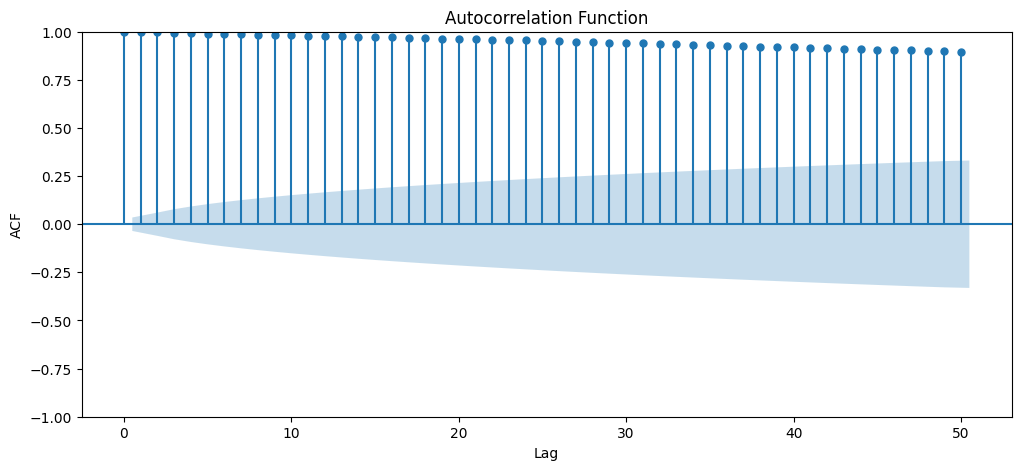

In [44]:
# Построение графика автокорреляционной функции
fig, ax = plt.subplots(figsize=(12, 5))
sm.graphics.tsa.plot_acf(df_without_outliers['curs'], lags=50, ax=ax)
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.title('Autocorrelation Function')
plt.show()